Муратов Никита 
БИСТ-20-1
Задание: выполнить обработку текста с использованием библеотеки natasha
по старой памяти ошибочно был выбран 18й вариант, (3й, т.к. вариантов всего 15)
Любой текст с упомянанием не менее 5 валют
Подсчитать общую сумму денег среди валют и перевести всё это в одну валюту

In [1]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)


импортируем всё из natasha на всякий случай

In [2]:
import codecs
fileObj = codecs.open( "lab10_drift_tuning_prices.txt", "r", "utf_8_sig" )
text = fileObj.read() 
fileObj.close()
doc = Doc(text)
doc


Doc(text='В автомобильной терминологии дрифт - это управляе...)

добавляем наш текстовый документ

In [3]:
doc.segment(segmenter)
display(doc)
display(doc.sents[:2])
display(doc.tokens[:5])

Doc(text='В автомобильной терминологии дрифт - это управляе..., tokens=[...], sents=[...])

[DocSent(stop=196, text='В автомобильной терминологии дрифт - это управляе..., tokens=[...]),
 DocSent(start=200, stop=396, text='Исторически, дрифт возник как техника в гонках, о..., tokens=[...])]

[DocToken(stop=1, text='В'),
 DocToken(start=2, stop=15, text='автомобильной'),
 DocToken(start=16, stop=28, text='терминологии'),
 DocToken(start=29, stop=34, text='дрифт'),
 DocToken(start=35, stop=36, text='-')]

In [4]:
moneyArray = []
moneyArray = list(money_extractor(text))

создаем список данными, доставая их из текста через встроенную в natasha функцию

так как наташа недоработала переносим данные из списка в !двумерный массив, параллельно смотря что там лежит

In [5]:

two_dim_arr = []
for match in moneyArray:
    amount = match.fact.amount
    currency = match.fact.currency
    two_dim_arr.append([amount, currency])
    print("Amount:", amount)
    print("Currency:", currency)
    print()

two_dim_arr


Amount: 2000
Currency: EUR

Amount: 2000
Currency: USD

Amount: 80000
Currency: RUB

Amount: 1000
Currency: EUR

Amount: 1000
Currency: USD

Amount: 50000
Currency: RUB

Amount: 1000
Currency: EUR

Amount: 800
Currency: USD

Amount: 50000
Currency: RUB

Amount: 1500
Currency: RUB

Amount: 23500
Currency: RUB

Amount: 20000
Currency: RUB

Amount: 700
Currency: RUB

Amount: 300
Currency: RUB

Amount: 700
Currency: RUB

Amount: 7500
Currency: RUB

Amount: 2500
Currency: RUB

Amount: 1500
Currency: RUB

Amount: 2500
Currency: RUB

Amount: 2000
Currency: RUB

Amount: 2000
Currency: RUB

Amount: 1500
Currency: RUB

Amount: 76000
Currency: RUB

Amount: 20000
Currency: RUB

Amount: 15000
Currency: RUB

Amount: 6000
Currency: RUB

Amount: 4000
Currency: RUB

Amount: 4000
Currency: RUB

Amount: 3500
Currency: RUB

Amount: 3000
Currency: RUB

Amount: 3000
Currency: RUB

Amount: 3000
Currency: RUB

Amount: 2500
Currency: RUB

Amount: 2500
Currency: RUB

Amount: 2500
Currency: RUB

Amount: 1500
Cur

[[2000, 'EUR'],
 [2000, 'USD'],
 [80000, 'RUB'],
 [1000, 'EUR'],
 [1000, 'USD'],
 [50000, 'RUB'],
 [1000, 'EUR'],
 [800, 'USD'],
 [50000, 'RUB'],
 [1500, 'RUB'],
 [23500, 'RUB'],
 [20000, 'RUB'],
 [700, 'RUB'],
 [300, 'RUB'],
 [700, 'RUB'],
 [7500, 'RUB'],
 [2500, 'RUB'],
 [1500, 'RUB'],
 [2500, 'RUB'],
 [2000, 'RUB'],
 [2000, 'RUB'],
 [1500, 'RUB'],
 [76000, 'RUB'],
 [20000, 'RUB'],
 [15000, 'RUB'],
 [6000, 'RUB'],
 [4000, 'RUB'],
 [4000, 'RUB'],
 [3500, 'RUB'],
 [3000, 'RUB'],
 [3000, 'RUB'],
 [3000, 'RUB'],
 [2500, 'RUB'],
 [2500, 'RUB'],
 [2500, 'RUB'],
 [1500, 'RUB'],
 [1500, 'RUB'],
 [1500, 'RUB'],
 [1500, 'RUB'],
 [2500, 'RUB'],
 [15000, 'RUB'],
 [10000, 'RUB'],
 [3000, 'RUB'],
 [5000, 'RUB'],
 [6500, 'RUB'],
 [151500, 'RUB'],
 [76000, 'RUB'],
 [23500, 'RUB'],
 [15000, 'RUB'],
 [10000, 'RUB'],
 [7500, 'RUB'],
 [3000, 'RUB'],
 [2500, 'RUB'],
 [2500, 'RUB'],
 [2500, 'RUB'],
 [2000, 'RUB'],
 [2000, 'RUB'],
 [2000, 'RUB'],
 [1500, 'RUB'],
 [1500, 'RUB'],
 [500, 'RUB'],
 [20000, 'RUB

наташа мало того что недоработала с форматом данных, так еще и не считает Японские Йены и Английские Фунты Стерлинга за настоящую валюту и просто их игнорирует.

In [6]:
i = 0
sum = 0
convertedCur = [0]*len(two_dim_arr)
for i in range(0,len(two_dim_arr)):
    if two_dim_arr[i][1] == 'RUB':
        convertedCur[i] =two_dim_arr[i][0]
        sum += convertedCur[i]
    if two_dim_arr[i][1] == 'USD':
        convertedCur[i] =two_dim_arr[i][0]*93.77
        sum += convertedCur[i]
    if two_dim_arr[i][1] == 'EUR':
        convertedCur[i] =two_dim_arr[i][0]*99.87
        sum += convertedCur[i]
print("sum =",sum,'₽')

sum = 4876609.0 ₽


считаем сумму всех валют и выводим её в рублях

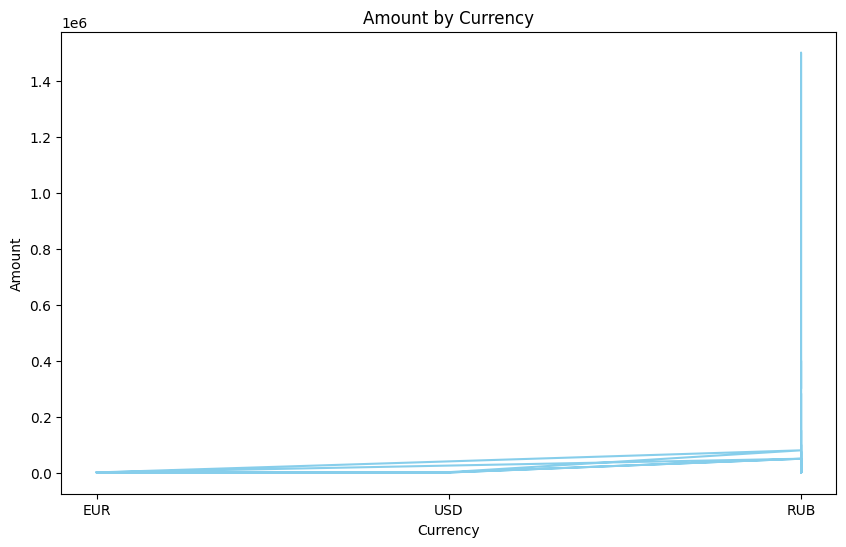

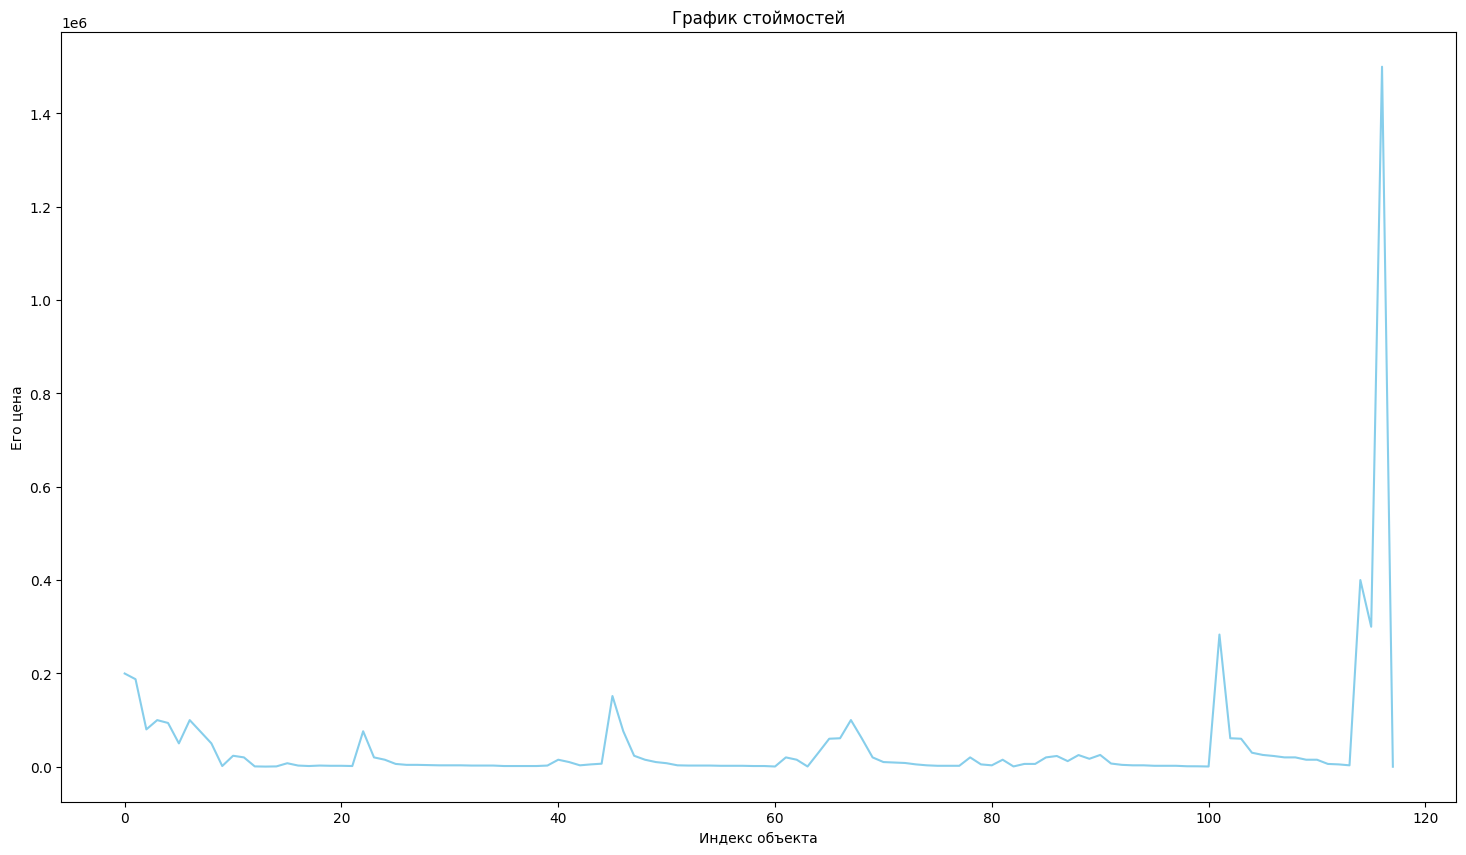

In [7]:
import matplotlib.pyplot as plt

# Создаем пустые списки для хранения данных
amounts = []
currencies = []

# Заполняем списки данными
for match in moneyArray:
    amounts.append(match.fact.amount)
    currencies.append(match.fact.currency)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(currencies, amounts, color='skyblue')

# Добавляем заголовок и метки осей
plt.title('Amount by Currency')
plt.xlabel('Currency')
plt.ylabel('Amount')

# Отображаем график
plt.show()

# Создаем график
plt.figure(figsize=(18, 10))
plt.plot(convertedCur, color='skyblue')

# Добавляем заголовок и метки осей
plt.title('График стоймостей')
plt.xlabel('Индекс объекта')
plt.ylabel('Его цена')

# Отображаем график
plt.show()

Ну и куда же без графика который показывает то, что и так понятно из данных